In [1]:
import pandas as pd         # Подключим библиотеку "панд"
import numpy as np    # Подключим библиотеку numpy

In [2]:
from sklearn.linear_model import LogisticRegression   # Импортируем логистическую регрессию
from sklearn.model_selection import train_test_split    # Импортируем метод разбивки на тренировочнуые и тестовые выборки

In [3]:
from sklearn.metrics import confusion_matrix, classification_report   # Импортируем для классификации

In [4]:
# Импортируем для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive    # Импортируем для подключения гугл диска
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# Так постепенно можно полностью посмотреть путь
#!ls /content/gdrive
!ls /content/gdrive/MyDrive/'Colab Notebooks'/NLP/NLP_3
#  Внимание!!! если делать через !ls то название папки с пробелом указывается в кавычках,
# а если мы будем уже дальше в python его использовать, то без кавычек.

' Copy NLP_DZ3_Sirutis.ipynb'
 nlp_course_seminar_03_embeddings.ipynb
 nlp_course_seminar_03_w2v_translation.ipynb
 NLP_DZ3_Sirutis.ipynb
 spam_or_not_spam.csv
'Копия  Copy NLP_DZ3_Sirutis.ipynb'


In [7]:
path = "/content/gdrive/MyDrive/Colab Notebooks/NLP/NLP_3/spam_or_not_spam.csv"   # Запишем путь
file = open(path,'r')   # Откроем файл
data = pd.read_csv(file)    # Считаем файл
file.close()    # Закроем файл

In [8]:
data.head(10)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
5,i just had to jump in here as carbonara is on...,0
6,the scotsman NUMBER august NUMBER playboy want...,0
7,martin adamson wrote isn t it just basically a...,0
8,the scotsman thu NUMBER aug NUMBER meaningful ...,0
9,i have been trying to research via sa mirrors ...,0


In [9]:
# Этот код для локальной загрузки.

#from google.colab import files
#files.upload()

#data = pd.read_csv('spam_or_not_spam.csv', encoding='iso-8859-1')   # Загрузим в data библиотеку "спам или не спам", 
                                                                    # котороя скачена и лежит в папке где и проект.
#data.head()         # Посмотрим примерно, что она из себя представляет.

In [10]:
data.shape             # Посмотрим размер.

(3000, 2)

In [11]:
data.index.unique()     # Посмотрим правильность индексов.

RangeIndex(start=0, stop=3000, step=1)

In [12]:
# Переименуем стобцы.
data = data[['email','label']].rename(columns={'email':'text', 'label' :'spam'})
data.head()

,text,spam
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [13]:
data.value_counts('spam')       # Посмотрим распределение значений "Спама"

spam
0    2500
1     500
dtype: int64

Стоп-слова для англиского языка в spaCy

In [14]:
import spacy    # Импортируем библиотеку

In [15]:
nlp_sm = spacy.load("en_core_web_sm")       # Загрузим
stopwords_sm = nlp_sm.Defaults.stop_words   # "СТОП СЛОВА"
print(f'Spacy english stopwords size (web_sm): {len(stopwords_sm)}', end='\n\n')
' '.join(stopwords_sm)                      # Посмотрим

Spacy english stopwords size (web_sm): 326



"also further thereupon put seem done latter itself might off sometime everywhere whether whom n't n’t give would sixty therefore amount eight is much none becoming made ‘m because mine that nowhere so moreover to was re have cannot among top without after somehow show forty noone been where then really for which onto he last ’s those upon full fifteen myself wherein ca above had do whereby from either however his thence some will behind anywhere ’ll name himself latterly something you ‘re six beforehand again neither than whose it hereupon just ever each five take everything even could still yet your empty but these sometimes no call my unless 'd our before wherever over n‘t its with always others being yourself nothing several hers are me part other themselves except hereby various while anything due regarding their many 've if whence three nine they whatever less a another ’re herein please few why into were back already at in via anyway seeming perhaps hence how what almost side 's

In [16]:
data['text']= data['text'].astype(str)      #Приведём к типу str.

Атрибуты Token

In [17]:
%%time

data['cleaned_text_sm'] = data['text'].apply(
    lambda x: ' '.join(
        token.lemma_.lower() for token in nlp_sm(x) if  # Приведём к нижнему регистру и смотрим
        not token.is_stop                               # Стоп слова 
        and not token.is_punct                          # Пунктуация
        #and not token.is_digit                          # Цифра
        #and not token.like_email                        # Электронный почтовый адресс
        #and not token.like_num                          # Описание цифры
        and not token.is_space                          # Пробельные символы
    )
)
data.sample(15)

CPU times: user 2min 24s, sys: 962 ms, total: 2min 25s
Wall time: 2min 28s


,text,spam,cleaned_text_sm
973,i use exmh NUMBER NUMBER with procmail for pre...,0,use exmh number number procmail presorte incom...
2897,hyperlink you ve been hand selected to access...,1,hyperlink ve hand select access exclusive work...
1086,on mon feb NUMBER NUMBER at NUMBER NUMBER NUMB...,0,mon feb number number number number numberpm n...
2166,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0,url url date number number numbertnumber numbe...
1967,url URL date not supplied males suffer more pa...,0,url url date supply male suffer parasitic infe...
350,mike masnick wrote why is it that people don t...,0,mike masnick write people don t understand giv...
988,on mon NUMBER sep NUMBER NUMBER NUMBER NUMBER ...,0,mon number sep number number number number num...
371,reza b far ebuilt wrote problems why do most c...,0,reza b far ebuilt write problem computer scien...
442,i dunno bb women who like to be thought of thi...,0,dunno bb woman like think way right choose tre...
394,today an apt get upgrade holds back php and su...,0,today apt upgrade hold php submodule like php ...


# Gensim

[Gensim](https://radimrehurek.com/gensim/index.html) – библиотека обработки естественного языка предназначения для «Тематического моделирования». С его помощью можно обрабатывать тексты, работать с векторными моделями слов (такими как Word2Vec, FastText и т. д.) и создавать тематические модели текстов

In [18]:
#!pip install gensim

In [19]:
import gensim.downloader as api     # Импортируем загрузчик gensim
import warnings                     # импортируем блок warnin-гов для их игнорирования.

warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
wv_en = api.load('glove-wiki-gigaword-100')

[=================================================-] 98.5% 126.2/128.1MB downloaded

In [21]:
type(wv_en)

gensim.models.keyedvectors.KeyedVectors

In [22]:
word_vector = wv_en['apple']      # Для примера посмотрим вектор слова "apple" (яблоко) в данной уже обученной модели.
word_vector.shape

(100,)

In [23]:
wv_en.most_similar(positive=['apple', 'python'], topn=5)     # Посмотрим что покажет.

[('software', 0.5999448299407959),
 ('linux', 0.5880342125892639),
 ('microsoft', 0.570721447467804),
 ('blackberry', 0.5705849528312683),
 ('computer', 0.5621128678321838)]

In [24]:
wv_en.most_similar(positive=['duck'], negative=['female'], topn=5)  # Для проверки что это близко к утке, но не женщина.

[('confit', 0.5801767110824585),
 ('darkwing', 0.5414749979972839),
 ('venison', 0.526385486125946),
 ('daffy', 0.4835190176963806),
 ('quacking', 0.4802570939064026)]

In [25]:
# Посмотрим какое слово самое далёкое
print(wv_en.doesnt_match(['pen', 'eraser', 'door', 'bucket', 'girl']))

eraser


А теперь проведём обучение своих SkipGram эмбеддингов с Gensim

У нас уже скачен и обработан "спам не спам".

In [26]:
data['cleaned_text_sm'].head(6)     # пример обработанных данных

0    date d number aug number number number number ...
1    martin post tassos papadopoulo greek sculptor ...
2    man threaten explosion moscow thursday august ...
3    klez virus win t die prolific virus klez conti...
4    add cream spaghetti carbonara effect pasta mak...
5    jump carbonara favourite ask hell suppose use ...
Name: cleaned_text_sm, dtype: object

In [27]:
import gensim.models
import string

In [28]:
data = data[data.text.str.len() != 0]   #Удалим строки без текста

In [29]:
res = []

# Обработаем по другому.
for doc in nlp_sm.pipe(data['text']):
    res.append([token.lemma_ for token in doc if token.lemma_ not in string.punctuation and not token.is_stop])
    

In [30]:
# Это что было изначально обработано.
data['cleaned_text_sm'][10]

'hello see discuss article approach thank url hell rule try accomplish thomas alva edison url email sponsor osdn tired old cell phone new free url spamassassin devel mailing list spamassassin devel url url'

In [31]:
print(res[0])

[' ', 'date', 'd', 'NUMBER', 'aug', 'NUMBER', 'NUMBER', 'NUMBER', 'number', 'number', 'chris', 'garrigues', 'cwg', 'date', 'NUMBER', 'NUMBERfaNUMBERd', 'deepeddy', 'com', 'message', 'd', 'NUMBER', 'NUMBER', 'tmda', 'deepeddy', 'vircio', 'com', 't', 'reproduce', 'error', 'repeatable', 'like', 'time', 'fail', 'debug', 'log', 'pick', 'happen', 'NUMBER', 'NUMBER', 'NUMBER', 'pick_it', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'number', 'number', 'sequence', 'mercury', 'NUMBER', 'NUMBER', 'NUMBER', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'number', 'number', 'sequence', 'mercury', 'NUMBER', 'NUMBER', 'NUMBER', 'ftoc_pickmsgs', 'number', 'hit', 'NUMBER', 'number', 'number', 'mark', 'NUMBER', 'hit', 'NUMBER', 'NUMBER', 'NUMBER', 'tkerror', 'syntax', 'error', 'expression', 'int', 'note', 'run', 'pick', 'command', 'hand', 'delta', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbr

## **Skip Gram**

In [32]:
%%time

model_W2V_skip_gram = gensim.models.Word2Vec(
    sentences=res, 
    vector_size=256, # vector_size, default = 100
    window=5, # default = 5
    min_count=3, 
    sg=1, # Training algorithm: 1 for skip-gram; otherwise CBOW
    hs=0, #  If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.
    negative=5, # If > 0, negative sampling will be used, if set to 0, no negative sampling is used.
    epochs=25, # epochs, Number of iterations (epochs) over the corpus
    seed=2023,
)

CPU times: user 1min 53s, sys: 239 ms, total: 1min 53s
Wall time: 1min 10s


In [33]:
list(model_W2V_skip_gram.wv.key_to_index)[:10]

['NUMBER', 'number', 's', 'url', 'URL', 't', 'list', 'time', 'write', 'people']

In [34]:
# Для проверки попробуем взять слово из 11-го текста. Рядом со словом "sponsor".
model_W2V_skip_gram.wv.most_similar(positive=['sponsor'], topn=5) 

[('osdn', 0.7126435041427612),
 ('thinkgeek', 0.7051084041595459),
 ('jabber', 0.6602119207382202),
 ('joetopshot', 0.539314866065979),
 ('email', 0.5303345322608948)]

In [35]:
# Для проверки ещё попробуем взять слово из 11-го текста. Рядом со словом "odsn".
model_W2V_skip_gram.wv.most_similar(positive=['osdn'], topn=5)

[('tired', 0.7747728228569031),
 ('sponsor', 0.7126435041427612),
 ('thinkgeek', 0.6490980386734009),
 ('webmake', 0.6195493340492249),
 ('joetopshot', 0.6138551235198975)]

In [36]:
# Для проверки посмотрим какое из этих слов не подходит.
model_W2V_skip_gram.wv.doesnt_match(['sponsor', 'thinkgeek', 'door', 'jabber', 'webmake'])

'door'

In [37]:
vocab_skip_gram = model_W2V_skip_gram.wv.key_to_index.keys()    # Это словарь слов в модели

In [38]:
X_skip_gram = []   # Здесь будет полученный результат
Y_skip_gram = []
i=0
for sentence in res:    # Пройдёмся по всем предложеним в наших данных "res"
  sentence_vectors = []   # Создадим пустой список для векторов слов в предложении
  for word in sentence:   # Пройдёмся по всем словам в предложении
    if word in vocab_skip_gram:   # Если слово присутствует в словаре полученной модели, тогда..
      sentence_vectors.append(model_W2V_skip_gram.wv[word])   # Добавим вектор каждого слова в предложении
      
  if sentence_vectors:    # Если не пустой
    X_skip_gram.append(np.mean(sentence_vectors, axis=0))    # В результат положим вектор предложения, 
                                                      # полученный как усреднённое значение векторов слов в предложении.
    Y_skip_gram.append(data.spam[i])    # и соответствующую метку
  else :
    print('data = ',sentence)
    print('spam = ', data.spam[i])
  i=i+1     # увеличим счётчик

data =  ['nan']
spam =  1


In [39]:
len(X_skip_gram) # Проверим длинну X

2999

In [40]:
len(Y_skip_gram)    # Проверим длину Y

2999

In [41]:
# Разделим на выборки
X_train_skip_gram, X_test_skip_gram, y_train_skip_gram, y_test_skip_gram = train_test_split(X_skip_gram, Y_skip_gram, random_state=2303)

In [42]:
log_reg_model_skip_gram = LogisticRegression()    # Создадим модель логистической регрессии
log_reg_model_skip_gram.fit(X_train_skip_gram, y_train_skip_gram)   # Обучим модель
pred_skip_gram = log_reg_model_skip_gram.predict(X_test_skip_gram)    # Посмотрим результат
print(classification_report(y_test_skip_gram, pred_skip_gram))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       622
           1       0.96      0.91      0.94       128

    accuracy                           0.98       750
   macro avg       0.97      0.95      0.96       750
weighted avg       0.98      0.98      0.98       750



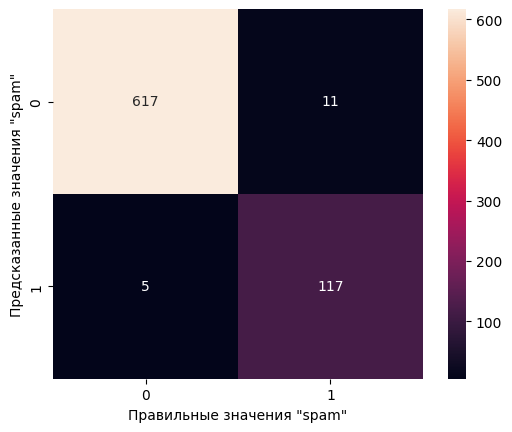

In [43]:
visual_skip_gram = confusion_matrix(y_test_skip_gram, pred_skip_gram)
sns.heatmap(visual_skip_gram.T, square=True, annot=True, fmt="d")
plt.xlabel('Правильные значения "spam"')
plt.ylabel('Предсказанные значения "spam"')
plt.show()

В случае с Skip Gram  получили  точность 0.98. Видно, что были опеределены ошибочно 10 как не "spam", а 6 как "spam".

## **CBOW**

In [44]:
%%time

model_W2V_CBOW = gensim.models.Word2Vec(
    sentences=res, 
    vector_size=256, # vector_size, default = 100
    window=10, # default = 5
    min_count=3, 
    sg=0, # Training algorithm: 1 for skip-gram; otherwise CBOW
    hs=0, #  If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.
    negative=5, # If > 0, negative sampling will be used, if set to 0, no negative sampling is used.
    epochs=25, # epochs, Number of iterations (epochs) over the corpus
    seed=2023,
)

CPU times: user 38.1 s, sys: 153 ms, total: 38.3 s
Wall time: 22.4 s


In [45]:
print(len(model_W2V_CBOW.wv.key_to_index))

10817


In [46]:
# Для проверки попробуем взять слово из 11-го текста. Рядом со словом "sponsor".
model_W2V_CBOW.wv.most_similar(positive=['sponsor'], topn=5) 

[('thinkgeek', 0.7744281888008118),
 ('osdn', 0.7689492106437683),
 ('geek', 0.749823808670044),
 ('jabber', 0.7208877801895142),
 ('tired', 0.7195780873298645)]

In [47]:
# Для проверки ещё попробуем взять слово из 11-го текста. Рядом со словом "odsn".
model_W2V_CBOW.wv.most_similar(positive=['osdn'], topn=5)

[('tired', 0.9359095692634583),
 ('cell', 0.8501704335212708),
 ('sponsor', 0.7689492702484131),
 ('heaven', 0.6448954343795776),
 ('thinkgeek', 0.6246991753578186)]

In [48]:
# Для проверки посмотрим какое из этих слов не подходит.
model_W2V_CBOW.wv.doesnt_match(['sponsor', 'thinkgeek', 'door', 'jabber', 'webmake'])

'door'

In [49]:
vocab_CBOW = model_W2V_skip_gram.wv.key_to_index.keys()    # Это словарь слов в модели

In [50]:
X_CBOW = []   # Здесь будет полученный результат
Y_CBOW = []
i=0
for sentence in res:    # Пройдёмся по всем предложеним в наших данных "res"
  sentence_vectors = []   # Создадим пустой список для векторов слов в предложении
  for word in sentence:   # Пройдёмся по всем словам в предложении
    if word in vocab_CBOW:   # Если слово присутствует в словаре полученной модели, тогда..
      sentence_vectors.append(model_W2V_CBOW.wv[word])   # Добавим вектор каждого слова в предложении
      
  if sentence_vectors:    # Если не пустой
    X_CBOW.append(np.mean(sentence_vectors, axis=0))    # В результат положим вектор предложения, 
                                                      # полученный как усреднённое значение векторов слов в предложении.
    Y_CBOW.append(data.spam[i])    # и соответствующую метку
  else :
    print('data = ',sentence)
    print('spam = ', data.spam[i])
  i=i+1     # увеличим счётчик

data =  ['nan']
spam =  1


In [51]:
# Разделим на выборки
X_train_CBOW, X_test_CBOW, y_train_CBOW, y_test_CBOW = train_test_split(X_CBOW, Y_CBOW, random_state=2303)

In [52]:
log_reg_model_CBOW = LogisticRegression()    # Создадим модель логистической регрессии
log_reg_model_CBOW.fit(X_train_CBOW, y_train_CBOW)   # Обучим модель
pred_CBOW = log_reg_model_CBOW.predict(X_test_CBOW)    # Посмотрим результат
print(classification_report(y_test_CBOW, pred_CBOW))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       622
           1       0.93      0.97      0.95       128

    accuracy                           0.98       750
   macro avg       0.96      0.98      0.97       750
weighted avg       0.98      0.98      0.98       750



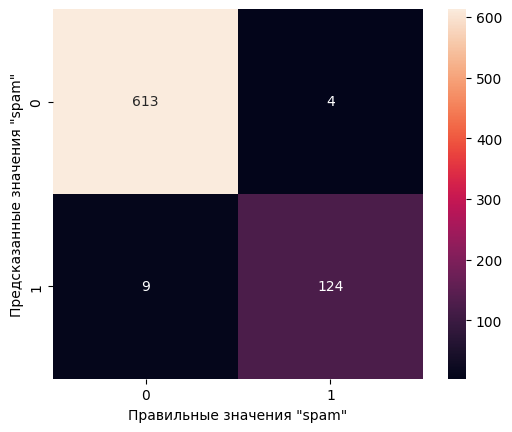

In [53]:
visual_CBOW = confusion_matrix(y_test_CBOW, pred_CBOW)
sns.heatmap(visual_CBOW.T, square=True, annot=True, fmt="d")
plt.xlabel('Правильные значения "spam"')
plt.ylabel('Предсказанные значения "spam"')
plt.show()

В случае с CBOW получили  точность 0.98. Видно, что были опеределены ошибочно 4 как не "spam", а 9 как "spam".

# **FastText**
Обучим свою модель

In [54]:
#!pip install fasttext

In [55]:
list(gensim.downloader.info()['models'].keys())   # Посмотрим что есть в gensim ))

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [56]:
from gensim.models import FastText    # Импортируем FastText

In [57]:
model_fast_text = FastText(vector_size=256, window=10, min_count=3)    # Создадим модель FastText
# size — размер вектора,
# window — размер окна наблюдения,
# min_count — мин. частотность слова в корпусе,

In [58]:
model_fast_text.build_vocab(corpus_iterable = res)   # строительство словаря

In [59]:
#from fasttext.FastText import cbow
%%time
model_fast_text.train(corpus_iterable =res, total_examples=len(res),epochs=20)
# # обучение модели 
# первый аргумент - наша выборка, генератор будет вкидывать в модель наши тексты, пока они не кончатся
# второй аргумент - число примеров в выборке 
# третий аргумент - количество эпох обучения: сколько раз модель пройдётся по всему корпусу текстов

CPU times: user 4min 24s, sys: 399 ms, total: 4min 25s
Wall time: 2min 40s


(6687140, 7976600)

In [60]:
list(model_fast_text.wv.key_to_index)[:10]    # Посмотрим что в словаре

['NUMBER', 'number', 's', 'url', 'URL', 't', 'list', 'time', 'write', 'people']

In [61]:
vocab_fast_text = model_fast_text.wv.key_to_index.keys()    # Это словарь слов в модели

In [62]:
# Для проверки ещё попробуем взять слово из 11-го текста. Рядом со словом "odsn".
model_fast_text.wv.most_similar(positive=['sponsor'], topn=5)

[('sensor', 0.7471818923950195),
 ('osdn', 0.7280378937721252),
 ('spoof', 0.7260761857032776),
 ('censor', 0.7244489192962646),
 ('geek', 0.7086994051933289)]

In [63]:
# Для проверки посмотрим какое из этих слов не подходит.
model_fast_text.wv.doesnt_match(['sponsor', 'thinkgeek', 'door', 'jabber', 'webmake'])

'door'

Обучим логистической регресии

In [64]:
X_fast_text = []   # Здесь будет полученный результат
Y_fast_text = []
i=0
for sentence in res:    # Пройдёмся по всем предложеним в наших данных "res"
  sentence_vectors = []   # Создадим пустой список для векторов слов в предложении
  for word in sentence:   # Пройдёмся по всем словам в предложении
    if word in vocab_fast_text:   # Если слово присутствует в словаре полученной модели, тогда..
      sentence_vectors.append(model_fast_text.wv[word])   # Добавим вектор каждого слова в предложении
      
  if sentence_vectors:
    X_fast_text.append(np.mean(sentence_vectors, axis=0))    # В результат положим вектор предложения, 
                                                      # полученный как усреднённое значение векторов слов в предложении.
    Y_fast_text.append(data.spam[i])
  else :
    print('data = ',sentence)
    print('spam = ', data.spam[i])
  i=i+1

data =  ['nan']
spam =  1


In [65]:
# Разделим на выборки
X_train_fast_text, X_test_fast_text, y_train_fast_text, y_test_fast_text = train_test_split(X_fast_text, Y_fast_text, random_state=2303)

In [66]:
log_reg_model_fast_text = LogisticRegression()    # Создадим модель логистической регрессии
log_reg_model_fast_text.fit(X_train_fast_text, y_train_fast_text)   # Обучим модель
pred_fast_text = log_reg_model_fast_text.predict(X_test_fast_text)    # Посмотрим результат
print(classification_report(y_test_fast_text, pred_fast_text))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       622
           1       0.90      0.94      0.92       128

    accuracy                           0.97       750
   macro avg       0.94      0.96      0.95       750
weighted avg       0.97      0.97      0.97       750



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


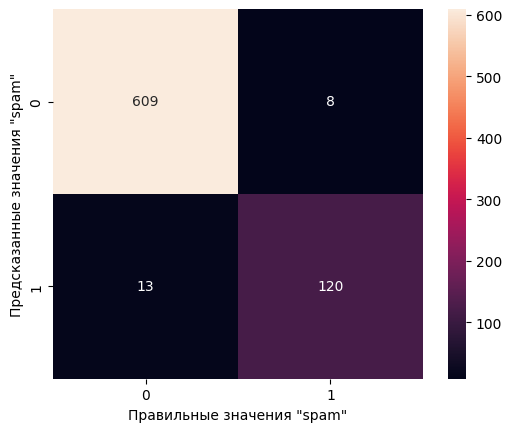

In [67]:
visual_fast_text = confusion_matrix(y_test_fast_text, pred_fast_text)
sns.heatmap(visual_fast_text.T, square=True, annot=True, fmt="d")
plt.xlabel('Правильные значения "spam"')
plt.ylabel('Предсказанные значения "spam"')
plt.show()

В случае с FastText получили  точность 0.97. Видно, что были опеределены ошибочно 9 как не "spam", а 12 как "spam".